In [1]:
import pandas as pd
import seaborn as sns

# original audio clips tagging

In [2]:
tag_df = pd.read_csv('./original_tag.csv',index_col=0)
tag_df = tag_df.set_index('youtube_id')
tag_df

,Animal,Ding,Ding-dong,"Jingle, tinkle",Music,Music for children,Musical instrument,Ringtone,Speech,Ukulele,...,Didgeridoo,Insect,String section,Zing,Radio,Carnatic music,Beatboxing,Cymbal,Drum roll,Opera
youtube_id,,,,,,,,,,,,,,,,,,,,,
normalize_5s_intro_xhmtXrtLkgo.wav,0.020389,0.023465,0.197111,0.032974,0.756231,0.053933,0.033150,0.105358,0.063998,0.03217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
normalize_5s_intro_n4HTXYR-2AI.wav,NaN,NaN,NaN,NaN,0.777438,NaN,0.125399,NaN,0.036571,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
normalize_5s_intro_hejXc_FSYb8.wav,NaN,NaN,NaN,NaN,0.818272,NaN,0.250368,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
normalize_5s_intro_IYnu4-69fTA.wav,NaN,NaN,NaN,NaN,0.881486,NaN,0.383124,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
normalize_5s_intro_RoeRU5zxkak.wav,NaN,NaN,NaN,NaN,0.857055,NaN,0.176325,NaN,0.051970,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
normalize_5s_intro_JQTlG7NxJek.wav,NaN,NaN,NaN,NaN,0.865548,NaN,0.098746,NaN,0.035897,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
normalize_5s_intro_XkC8Uzl9pCY.wav,NaN,NaN,NaN,NaN,0.639237,NaN,0.100548,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146444
normalize_5s_intro_1CrxzClzLvs.wav,NaN,NaN,NaN,NaN,0.618778,NaN,0.170508,NaN,0.025771,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
tag_df.info(verbose=True, show_counts=True)

TypeError: info() got an unexpected keyword argument 'show_counts'

<AxesSubplot:ylabel='num'>

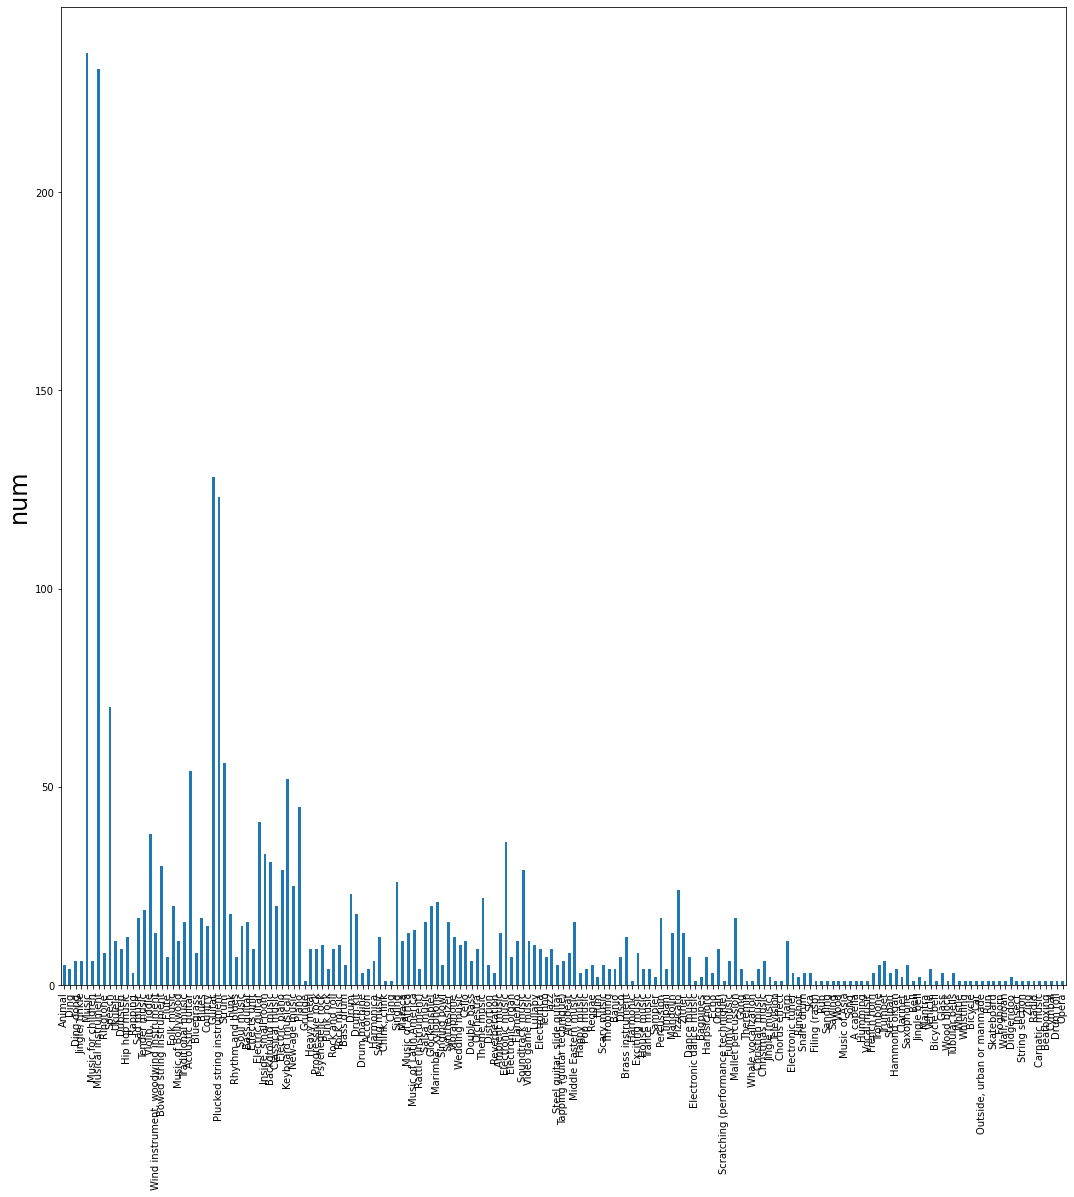

In [4]:
ax = tag_df.notna().sum()[tag_df.notna().sum()>0].plot(kind='bar',figsize=(18,18))
ax.set_ylabel("num",fontdict={'fontsize':24})
ax

In [5]:
score_df =  pd.read_csv('../../data/YTMM_details.csv',index_col=0)[['memorability_score']].reset_index()
score_df

,youtube_id,memorability_score
0,normalize_5s_intro_zyQkFh-E4Ak.wav,0.508772
1,normalize_5s_intro_ZvrysfBDzSs.wav,0.454545
2,normalize_5s_intro_zumMQrI_tMg.wav,0.481928
3,normalize_5s_intro_ZpDQJnI4OhU.wav,0.647059
4,normalize_5s_intro_zk04E79riMQ.wav,0.634409
...,...,...
230,normalize_5s_intro_0QN9KLFWn7I.wav,0.565217
231,normalize_5s_intro_0EVVKs6DQLo.wav,0.677966
232,normalize_5s_intro_0aC-jOKuBFE.wav,0.337209
233,normalize_5s_intro_-MqZKMbOYEA.wav,0.808219


In [6]:
df = pd.merge(tag_df[['Music','Musical instrument']], score_df, on='youtube_id').fillna(0)
df.head(3)

,youtube_id,Music,Musical instrument,memorability_score
0,normalize_5s_intro_xhmtXrtLkgo.wav,0.756231,0.033150,0.897436
1,normalize_5s_intro_n4HTXYR-2AI.wav,0.777438,0.125399,0.875000
2,normalize_5s_intro_hejXc_FSYb8.wav,0.818272,0.250368,0.870130


In [7]:
def save(df, col, clips_type):
    print('{}, corr {} and memorabilty score : {}'.format(clips_type, col, df[col].corr(df['memorability_score'])))
    plot = sns.scatterplot(x=col, y="memorability_score", data=df).get_figure()
    plot.savefig('./corr_tagging/'+clips_type+'_'+col+'.png') 
    plot.clf()

In [8]:
save(df=df, col='Music', clips_type='raw')
save(df=df, col='Musical instrument', clips_type='raw')

raw, corr Music and memorabilty score : 0.07947619419339105
raw, corr Musical instrument and memorabilty score : 0.153066291960605


<Figure size 432x288 with 0 Axes>

In [9]:
output_path = './tagging_df/original_tag_df.csv'
df.reset_index(level=0)[['youtube_id','Music','Musical instrument','memorability_score']].to_csv(output_path,index=False)

# truncation clips mapping tagging score to raw clip's 

In [10]:
mapping_df = pd.read_csv('./augmented_tag.csv',index_col=0)
mapping_df = mapping_df.set_index('youtube_id')[['Music','Musical instrument']].reset_index()
mapping_df

,youtube_id,Music,Musical instrument
0,SQBuVfTX1ME_original_7.wav,0.443128,0.102437
1,a8cJLohQ_Jg_1_semitones_1.wav,0.869792,0.245652
2,Yh78Ll6-ODQ_-2_semitones_2.wav,0.828451,0.574645
3,Yh78Ll6-ODQ_1_semitones_3.wav,0.780898,0.585475
4,xhmtXrtLkgo_3_semitones_9.wav,0.631058,0.051236
...,...,...,...
23260,IISA6t-9zzc_4_semitones_7.wav,0.915118,0.607213
23261,lE_747E_Sdg_-5_semitones_4.wav,0.884853,0.613089
23262,RCJx5VW-fQI_5_semitones_2.wav,0.929709,0.210700
23263,Z5gvqq3ChII_3_semitones_3.wav,0.917301,NaN


In [11]:
mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23265 entries, 0 to 23264
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   youtube_id          23265 non-null  object 
 1   Music               23265 non-null  float64
 2   Musical instrument  23106 non-null  float64
dtypes: float64(2), object(1)
memory usage: 545.4+ KB


In [13]:
tag_df = tag_df[['Music', 'Musical instrument']].fillna(0)
tag_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, normalize_5s_intro_xhmtXrtLkgo.wav to normalize_5s_intro_PALMMqZLAQk.wav
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Music               235 non-null    float64
 1   Musical instrument  235 non-null    float64
dtypes: float64(2)
memory usage: 5.5+ KB


In [14]:
tag_df = tag_df.reset_index()

In [15]:
mapping_df['memorability_score'] = 0.0

In [16]:
for idx, row in mapping_df.iterrows():
    original_id = 'normalize_5s_intro_' + row['youtube_id'][:11] + '.wav'
    music = tag_df.loc[tag_df['youtube_id'] == original_id]['Music']
    music_instrument = tag_df.loc[tag_df['youtube_id'] == original_id]['Musical instrument']
    score = score_df.loc[score_df['youtube_id'] == original_id]['memorability_score']
    mapping_df.at[idx, 'Music'] = music
    mapping_df.at[idx, 'Musical instrument'] = music_instrument
    mapping_df.at[idx, 'memorability_score'] = score

In [17]:
mapping_df

,youtube_id,Music,Musical instrument,memorability_score
0,SQBuVfTX1ME_original_7.wav,0.753669,0.424271,0.800000
1,a8cJLohQ_Jg_1_semitones_1.wav,0.796819,0.596798,0.524390
2,Yh78Ll6-ODQ_-2_semitones_2.wav,0.843092,0.569489,0.708333
3,Yh78Ll6-ODQ_1_semitones_3.wav,0.843092,0.569489,0.708333
4,xhmtXrtLkgo_3_semitones_9.wav,0.756231,0.033150,0.897436
...,...,...,...,...
23260,IISA6t-9zzc_4_semitones_7.wav,0.918317,0.669042,0.829545
23261,lE_747E_Sdg_-5_semitones_4.wav,0.740082,0.411122,0.883333
23262,RCJx5VW-fQI_5_semitones_2.wav,0.851572,0.166570,0.724638
23263,Z5gvqq3ChII_3_semitones_3.wav,0.925443,0.107286,0.875000


In [18]:
save(df=mapping_df, col='Music', clips_type='mapping')
save(df=mapping_df, col='Musical instrument', clips_type='mapping')

mapping, corr Music and memorabilty score : 0.07947619419339103
mapping, corr Musical instrument and memorabilty score : 0.15306629196060503


<Figure size 432x288 with 0 Axes>

In [19]:
mapping_df.to_csv('./tagging_df/mapping_tag_df.csv',index=False)

# truncation & pitch shifting

In [10]:
augmented_tag_df = pd.read_csv('./augmented_tag.csv',index_col=0)
augmented_tag_df = augmented_tag_df.set_index('youtube_id').reset_index()
augmented_tag_df.head(3)

,youtube_id,Animal,Brass instrument,Guitar,"Inside, small room",Keyboard (musical),Music,Musical instrument,Piano,Plucked string instrument,...,Hi-hat,"Beep, bleep","Rodents, rats, mice",Toot,"Child speech, kid speaking","Accelerating, revving, vroom",Clatter,Motorcycle,Chatter,Toilet flush
0,SQBuVfTX1ME_original_7.wav,0.016073,0.010102,0.012545,0.017117,0.012328,0.443128,0.102437,0.012858,0.010114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a8cJLohQ_Jg_1_semitones_1.wav,NaN,NaN,0.058275,NaN,NaN,0.869792,0.245652,NaN,0.086847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yh78Ll6-ODQ_-2_semitones_2.wav,NaN,NaN,0.265781,NaN,0.193863,0.828451,0.574645,0.138193,0.275029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='num'>

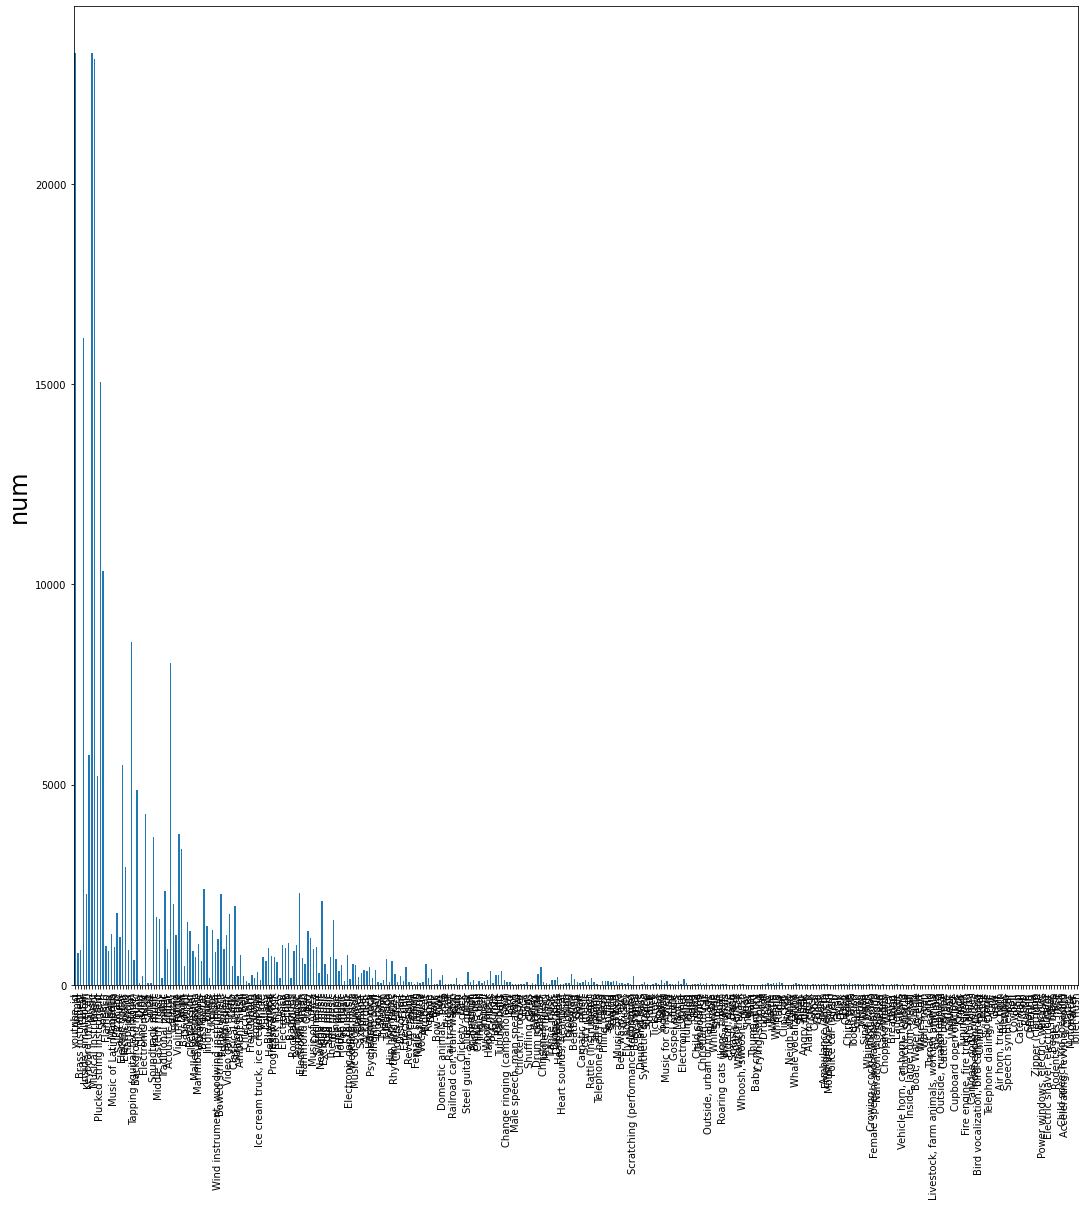

In [58]:
ax = augmented_tag_df.notna().sum()[augmented_tag_df.notna().sum()>0].plot(kind='bar',figsize=(18,18))
ax.set_ylabel("num",fontdict={'fontsize':24})
ax

In [65]:
augmented_tag_df = augmented_tag_df[['youtube_id','Music','Musical instrument']].fillna(0)
augmented_tag_df.head(2)

,youtube_id,Music,Musical instrument
0,SQBuVfTX1ME_original_7.wav,0.443128,0.102437
1,a8cJLohQ_Jg_1_semitones_1.wav,0.869792,0.245652


In [69]:
augmented_tag_df['memorability_score'] = 0.0
truncated_tagging = []

for idx, row in augmented_tag_df.iterrows():
    original_id = 'normalize_5s_intro_' + row['youtube_id'][:11] + '.wav'
    score = score_df.loc[score_df['youtube_id'] == original_id]['memorability_score']
    augmented_tag_df.at[idx, 'memorability_score'] = score
    if row['youtube_id'][-14:-6]=='original':
        truncated_tagging.append(augmented_tag_df.iloc[idx])

In [81]:
truncated_tagging = pd.DataFrame(truncated_tagging)
truncated_withPS_tagging = augmented_tag_df.copy()

In [82]:
print(len(truncated_tagging))
print(len(truncated_withPS_tagging))

2115
23265


In [83]:
save(df=truncated_tagging, col='Music', clips_type='truncation')
save(df=truncated_tagging, col='Musical instrument', clips_type='truncation')

truncation, corr Music and memorabilty score : -0.03854857935189092
truncation, corr Musical instrument and memorabilty score : 0.12305165425055145


<Figure size 432x288 with 0 Axes>

In [84]:
save(df=truncated_withPS_tagging, col='Music', clips_type='truncation&PS')
save(df=truncated_withPS_tagging, col='Musical instrument', clips_type='truncation&PS')

truncation&PS, corr Music and memorabilty score : -0.02670036627166933
truncation&PS, corr Musical instrument and memorabilty score : 0.12595638556274194


<Figure size 432x288 with 0 Axes>

In [87]:
truncated_withPS_tagging

,youtube_id,Music,Musical instrument,memorability_score
0,SQBuVfTX1ME_original_7.wav,0.443128,0.102437,0.800000
1,a8cJLohQ_Jg_1_semitones_1.wav,0.869792,0.245652,0.524390
2,Yh78Ll6-ODQ_-2_semitones_2.wav,0.828451,0.574645,0.708333
3,Yh78Ll6-ODQ_1_semitones_3.wav,0.780898,0.585475,0.708333
4,xhmtXrtLkgo_3_semitones_9.wav,0.631058,0.051236,0.897436
...,...,...,...,...
23260,IISA6t-9zzc_4_semitones_7.wav,0.915118,0.607213,0.829545
23261,lE_747E_Sdg_-5_semitones_4.wav,0.884853,0.613089,0.883333
23262,RCJx5VW-fQI_5_semitones_2.wav,0.929709,0.210700,0.724638
23263,Z5gvqq3ChII_3_semitones_3.wav,0.917301,0.000000,0.875000


In [88]:
truncated_tagging.to_csv('./tagging_df/truncated_tag_df.csv',index=False)
truncated_withPS_tagging.to_csv('./tagging_df/truncated_withPS_tag_df.csv',index=False)